In [53]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import sys
import os
# Add the 'scripts/' directory to the system path
sys.path.append(os.path.abspath('../triple_mbhb'))
import BH_kicks as kicks
from tqdm import tqdm

In [54]:
iso_file_path = '/Users/pranavsatheesh/Triples/Github/Triple-Outcomes/Data/iso_binaries_data_from_ill.h5'

In [55]:
with h5py.File(iso_file_path, 'r') as hf:
    for key in hf.keys():
         globals()[key] = np.array(hf[key])

In [63]:
vrandom_1 = []
for i in tqdm(range(len(qin)),desc="calculating kicks for iso binaries"):
    vrandom_1.append(kicks.gw_kick_calc(qin[i],fgas[i],n_realizations=1)[0])

calculating kicks for iso binaries: 100%|██████████| 7205/7205 [00:20<00:00, 360.05it/s]


In [64]:
vrandom_10 = []
for i in tqdm(range(len(qin)),desc="calculating kicks for iso binaries"):
    vrandom_10.append(kicks.gw_kick_calc(qin[i],fgas[i],n_realizations=10)[0])

calculating kicks for iso binaries: 100%|██████████| 7205/7205 [03:21<00:00, 35.73it/s]


In [65]:
vrandom_50 = []
for i in tqdm(range(len(qin)),desc="calculating kicks for iso binaries"):
    vrandom_50.append(kicks.gw_kick_calc(qin[i],fgas[i],n_realizations=50)[0])

calculating kicks for iso binaries: 100%|██████████| 7205/7205 [15:59<00:00,  7.51it/s]


vrandom_100 = []
for i in tqdm(range(len(qin)),desc="calculating kicks for iso binaries"):
    vrandom_100.append(kicks.gw_kick_calc(qin[i],fgas[i],n_realizations=100)[0])

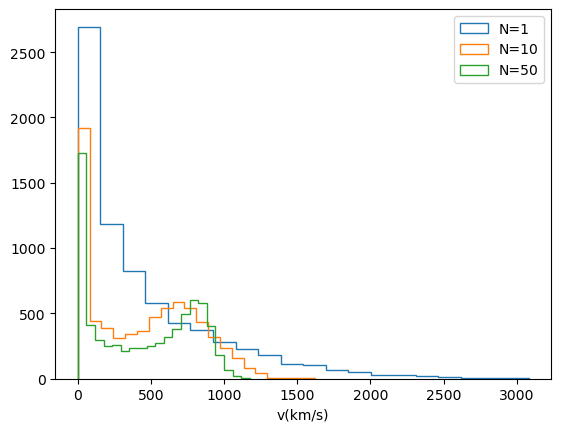

In [115]:
plt.hist(vrandom_1,histtype="step",bins=20,label="N=1")
plt.hist(vrandom_10,histtype="step",bins=20,label="N=10")
plt.hist(vrandom_50,histtype="step",bins=20,label="N=50")
plt.xlabel("v(km/s)")
plt.legend()

In [131]:
eta = qin/(1+qin)**2
A = 1.2e+4 # km/s  
B = -0.93  
Vm = A  *eta**2 * np.sqrt(1 - 4 * eta) * (1 + B * eta)
H = 6.9e+3 
V11 = 3677.76
Vp = H*eta**2/(1+qin)
#Vparallel = 16*eta**2/(1+qin)*V11

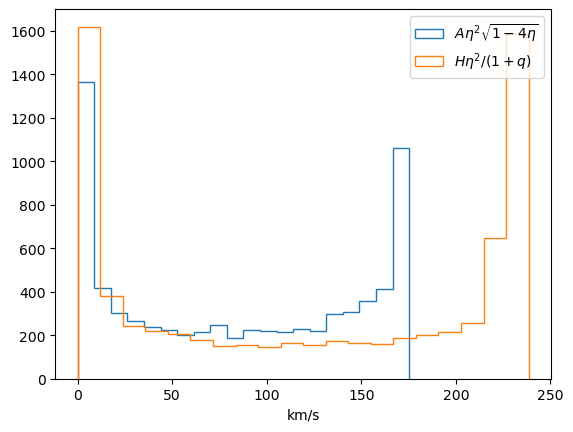

In [136]:
plt.hist(Vm,histtype="step",bins=20,label=r"$A \eta^2 \sqrt{1-4 \eta}$")
plt.hist(Vp,histtype="step",bins=20,label=r"$H \eta^2/(1+q)$")
plt.xlabel("km/s")
plt.legend()

In [67]:
import spin_models as spin

In [79]:
Nsample = 10000
magnitude_S1 = []
magnitude_S2 = []
theta_S1 = []
theta_S2 = []

for i in range(Nsample):
    S1_rand, S2_rand = spin.random_dry()
    magnitude_S1.append(np.linalg.norm(S1_rand))
    magnitude_S2.append(np.linalg.norm(S2_rand))
    theta_S1.append(np.arctan2(S1_rand[1], S1_rand[0]))
    theta_S2.append(np.arctan2(S2_rand[1], S2_rand[0]))

(array([ 978., 1022., 1000.,  977.,  978.,  968., 1030., 1022., 1014.,
        1011.]),
 array([2.89001905e-03, 1.80003766e+01, 3.59978631e+01, 5.39953497e+01,
        7.19928362e+01, 8.99903227e+01, 1.07987809e+02, 1.25985296e+02,
        1.43982782e+02, 1.61980269e+02, 1.79977755e+02]),
 [<matplotlib.patches.Polygon at 0x12a5ec100>])

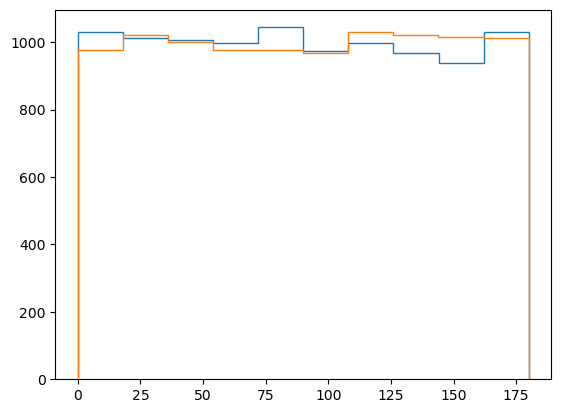

In [82]:
plt.hist(np.degrees(np.abs(theta_S1)),histtype="step")
plt.hist(np.degrees(np.abs(theta_S2)),histtype="step")

(array([  20.,  106.,  314.,  795., 1398., 2052., 2252., 1970.,  922.,
         171.]),
 array([0.18763769, 0.26702534, 0.346413  , 0.42580065, 0.5051883 ,
        0.58457595, 0.66396361, 0.74335126, 0.82273891, 0.90212656,
        0.98151422]),
 [<matplotlib.patches.Polygon at 0x165120a30>])

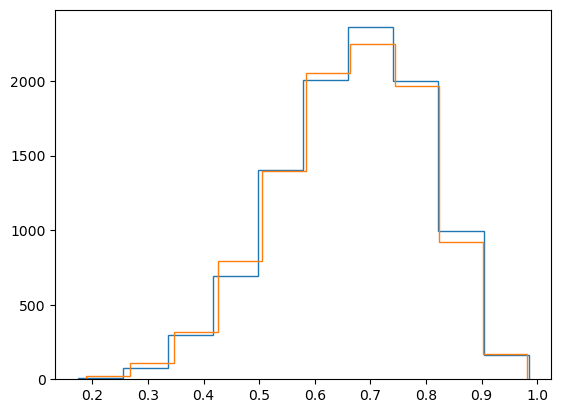

In [78]:
plt.hist(magnitude_S1,histtype="step")
plt.hist(magnitude_S2,histtype="step")

In [74]:
np.linalg.norm(S1_rand)

0.6561398165802765